**회사 설정** 
1.   세컨드파티 전환을 고려중인 서드파티 개발사
2.   회사규모 중견
3.   2018년 1분기에 개발시작할 예정.





# 1.EDA

In [45]:
# 18기 박경훈 section1 project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import scipy.stats as stats
"""
Name : 게임의 이름입니다.
Platform : 게임이 지원되는 플랫폼의 이름입니다.
Year : 게임이 출시된 연도입니다.
Genre : 게임의 장르입니다.
Publisher : 게임을 배급한 회사입니다.
NA_Sales : 북미지역에서의 출고량입니다.
EU_Sales : 유럽지역에서의 출고량입니다.
JP_Sales : 일본지역에서의 출고량입니다.
Other_Sales : 기타지역에서의 출고량입니다.
"""

df=pd.read_csv('vgames2.csv')
df.drop(df.columns[0],axis=1, inplace=True)
df.info()
display(df.head())
# 9개 feature, 16598개 관측치

# Year, Genre, Publisher 결측치 존재확인 (품질)
# Sales 부분 데이터타입 object로 잘못되어있음.(품질)
# Year 컬럼 데이터타입 float으로 잘못되어있음. (품질)
# Sales 부분 데이터구조가 Un-tidy함 (구조)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


## 중복치 확인 및 제거

In [46]:
# 중복치 확인 및 제거. 이때 composite key 는 Name과 Platform

# 중복치의 처음 인덱스가 정보가 많으므로 keep first
# 또, Sonic the Hedgehog의 결측치를 중복치 값으로 대체
df2=df.copy()
print('중복항목')
display(df[df.duplicated(subset=['Name','Platform'],keep=False)])
df2.loc[8651,'Year']=2006
df2.loc[8651,'Publisher']='Sega'
df2=df.drop_duplicates(subset=['Name','Platform'],keep='first')
print('처리 후 중복치 여부 : ',df2.duplicated().any())

중복항목


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1318,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.8,0.01,0.15
2673,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,20K,0.23,0,0.05
7346,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0,0.22
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
8651,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0,0.48,0,0
8717,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0,0.01,0,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
12529,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1,0.17,0.02,0.1
13808,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0,0.06,0,0.02
15705,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.07,0.04,0.66


처리 후 중복치 여부 :  False


## 결측치 확인 및 제거

In [47]:
# 결측치 확인 및 처리 (Year, Genre, Publisher)
display(df2[df2.isnull().any(1)])
# 중복치에서 채울만한 내용이 없으므로, 전부 드랍.
# 결측치 356개. 356*100/16958 = 2% 정도 손실이 있다.
df3=df2.drop(df2[df2.isnull().any(1)].index)
print('처리 이후 결측치여부\n',df3.isnull().sum())

# Sales column의 측정치 0 은 결측치는 아니지만 지역별 통계량을 낼때
# 왜곡이 생긴다. 하지만 바로 NaN으로 바꾸면 함수에 따라 오류가 나는경우 존재.
# 따라서 필요할때마다 NaN으로 바꿔서 진행.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16431,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16432,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16555,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


처리 이후 결측치여부
 Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


## 데이터타입 변환


In [48]:
# Sales 컬럼 데이터 확인 및 타입 변환
print('문제 있는 값들 샘플')
print(df3[df3.NA_Sales.str.contains(r'[a-zA-Z]',regex=True)].NA_Sales.sample(5, random_state=42),'\n')

id_cols=['Name','Platform','Year','Genre']
Sales_col=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

# Sales 컬럼에는 숫자 외에도 K, M이 존재. 이때 dataset 소스인 vgchartz의 설명을 근거로
# 백만단위 판매량으로 추정가능. 따라서 K, M은 각각 숫자에 0.001, 1을 곱하면 된다.
df4=df3.copy()
# 방법1
# iloc[:,-4:]=NA_Sales, EU_Sales, JP_Sales, Other_Sales
# df4.update(df3.iloc[:,-4:].replace(r'[MK]','',regex=True))
# for i in df4.columns[-4:]:
#     df4[i]=df4[i].astype(float)

# for i in range(1,5):
#     idx=df3[df3.iloc[:,-i].str.contains(r'K',regex=True)].index
#     df4.update(df4.loc[idx].iloc[:,-i]*0.001)
# df4.reset_index(drop=True, inplace=True)

# 방법2 : 더 깔끔하다.
changeMK=lambda x: float(x.replace('M','')) if 'M' in x\
else (float(x.replace('K',''))*0.001 if 'K' in x else float(x))

df4.loc[:,Sales_col]=df4[Sales_col].applymap(changeMK)

# Year 컬럼 int로 자료형 변환
df4['Year']=df4.Year.astype(int)

# 자료형 확인
print('처리 후 자료형')
df4.info()
# 자료형 전부 변환되었음

print('문제 있는 값들 처리 후')
print(df4.loc[[13719,7499,13935,6883,6303]].NA_Sales)

문제 있는 값들 샘플
13719    0.15M
7499     2.66M
13935    2570K
6883     0.11M
6303     0.31M
Name: NA_Sales, dtype: object 

처리 후 자료형
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16237 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16237 non-null  object 
 1   Platform     16237 non-null  object 
 2   Year         16237 non-null  int64  
 3   Genre        16237 non-null  object 
 4   Publisher    16237 non-null  object 
 5   NA_Sales     16237 non-null  float64
 6   EU_Sales     16237 non-null  float64
 7   JP_Sales     16237 non-null  float64
 8   Other_Sales  16237 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB
문제 있는 값들 처리 후
13719    0.15
7499     2.66
13935    2.57
6883     0.11
6303     0.31
Name: NA_Sales, dtype: float64


## 이상치 확인 및 처리

[2008 2009 2010 2005 2011 2007 2001 2003 2006 2014 2015 2002 1997 2013
 1996 2004 2000 1984 1998 2016 1985 1999    9   97 1995 1993 2012 1987
 1982   11 1994 1990   15 1992 1991 1983 1988 1981    3 1989   96    6
    8 1986    1    5    4   10   98    7   16   86   14   95 2017 1980
 2020    2   13    0   12   94]
Year 이상치 비율 :  0.006


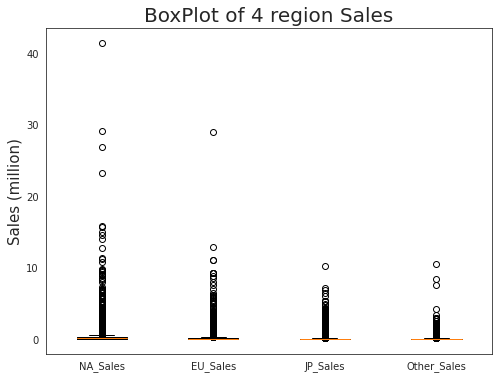

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [49]:
# 컬럼별 이상치의의 갯수를 먼저확인
# 이후 전체 관측치에 비해 비중이 적으면 드랍, 비중이 크면 해당 feature 분석시에만 따로 처리

# Year 이상치 확인
print(df4.Year.unique())
# 9, 97, 10 등 이상한 년도있음.
Yidx=df4.query("Year < 1800").index
print('Year 이상치 비율 : ',round(len(Yidx)/df4.shape[0],3))
# Year 이상치 비율 낮으므로 전부 드랍   
df4.drop(index=Yidx,inplace=True)
df4.reset_index(drop=True,inplace=True)

# 최신 년도의 게임은 2020년도에 하나있는데 (Imagine: Makeup Artist), 
# 찾아보니 2009년도 출시임. 집계시점이 상당히 느렸던것으로 보임.
# 따라서 집계년도를 2010으로 조정. 최신 년도는 2017년도로 변경됨. 다음 분기 게임은 2018년 1분기로 결정.
df4.loc[6725,'Year']=2010

# Sales 는 Boxplot으로 확인
plt.figure(figsize=(8,6))
plt.boxplot(df4[Sales_col],labels=Sales_col)
plt.ylabel('Sales (million)',fontsize=15)
plt.title('BoxPlot of 4 region Sales',fontsize=20)
plt.show()
# 4개 지역 모두 아웃라이어가 다수 존재. 즉 게임간 판매량 편차가 매우크다.
# 게임 타이틀 판매량은 크게 차이나는것이 직관적으로 맞다고 판단, 아웃라이어를 사전에
# 제거하지는 않고 추후 모델링시에 별도로 처리하기로 결정.

# 음수 판매량 있는지 확인
df4.query("NA_Sales<0 or EU_Sales<0 or JP_Sales<0 or Other_Sales<0")
# 음수 판매량은 없다.

## Tidy data & Feature engineering

In [50]:
# 기존 df4에 4개 지역 판매량을 합한 Total_Sales feature 생성
df4['Total_Sales']=df4[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
# Total_Salese = 0 인 항목이 하나 있다. 드랍
df4.drop(df4[df4.Total_Sales==0].index, inplace=True)

# Platform의 분류가 너무 많으므로, 관심있는 3개의 메이저콘솔 및 PC로 대분류.
# => Nintendo, PlayStation, XBox , 혹은 PC. 나머지는 Other로 취급
# NIntendo : DS, NS, Wii, WiiU, 3DS, NES, SNES, N64
# PlayStation : PS, PS2, PS3, PS4, PS5, PSP, PSV
# Xbox : X360, XOne, XB, XS
# 구분 출처 : https://www.vgchartz.com/charts/platform_totals/Hardware.php/
df4['Platform2']=['Other']*df4.shape[0]
Nidx=df4[df4.Platform.isin(['DS','NS','Wii','Wiiu','3DS','NES','SNES','N64'])].index
df4.loc[Nidx,'Platform2']='Nintendo'
Pidx=df4[df4.Platform.isin(['PS','PS2','PS3','PS4','PS5','PSP','PSV'])].index
df4.loc[Pidx,'Platform2']='PlayStation'
Xidx=df4[df4.Platform.isin(['X360','XOne','XB','XS'])].index
df4.loc[Xidx,'Platform2']='Xbox'
df4.loc[df4[df4.Platform=='PC'].index,'Platform2']='PC'

id_cols=['Name','Platform','Platform2','Year','Genre']
display(df4.head())

# Sales 컬럼 4개를 Tidy한 형태로 바꾼 df 별도 생성

df4_tidy=pd.melt(df4, id_vars=id_cols, value_vars=Sales_col,
                 var_name='Region', value_name='Sales')
df4_tidy.Region=df4_tidy.Region.str.replace('_Sales','')

df4_tidy.head()


# df4, df4_tidy를 기반으로 시각화 시작.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Platform2
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,Nintendo
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,Nintendo
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,PlayStation
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,Nintendo
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,PlayStation


,Name,Platform,Platform2,Year,Genre,Region,Sales
0,Candace Kane's Candy Factory,DS,Nintendo,2008,Action,NA,0.04
1,The Munchables,Wii,Nintendo,2009,Action,NA,0.17
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,PlayStation,2010,Adventure,NA,0.00
3,Deal or No Deal: Special Edition,DS,Nintendo,2010,Misc,NA,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,PlayStation,2010,Platform,NA,0.12


## 시각화

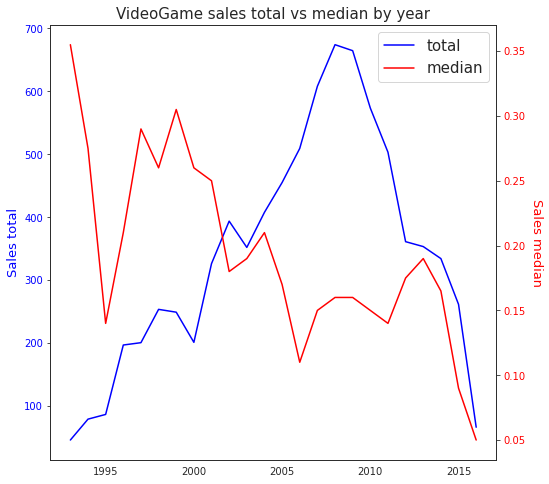

In [51]:
# 먼저, 연도별 타이틀 숫자를 확인. 숫자가 부족하면 데이터의 신뢰성이 떨어진다. n<50 인 데이터 드랍.
X=df4.Year.value_counts()<50
X=X[X].index.to_list()
df5=df4.drop(df4[df4.Year.isin(X)].index)

# 게임의 시장성을 판단하기 위해 연도별 판매량 총합 vs 판매량중간값을 확인
X=df5.groupby('Year').Total_Sales.sum()
X2=df5.groupby('Year').Total_Sales.median()

fig, ax1=plt.subplots(figsize=(8,8))
line1=ax1.plot(X.index, X.values, c='blue',label='total')
ax1.set_ylabel('Sales total',color='blue',fontsize=13)
ax1.tick_params(axis='y',labelcolor='blue')
ax2 = ax1.twinx()
line2=ax2.plot(X2.index, X2.values, c='red',label='median')
ax2.set_ylabel('Sales median',color='red',fontsize=13,
               rotation=-90, va='bottom')
ax2.tick_params(axis='y',labelcolor='red')
plt.title('VideoGame sales total vs median by year',
          fontsize=15)
lines=line1+line2
labs=[i.get_label() for i in lines]
ax1.legend(lines, labs, fontsize=15)
plt.show()
# 연도별 판매량 총합은 증가하는 추세인데, 개별 타이틀 판매량 중간값은 횡보중임.
# 즉, 2018년 기준으로 판단할때 비디오게임 개발이 블루오션은 아니다.
# *2016년 이후의 상황은 관측치 자체가 급감하면서 나오는현상으로, 신뢰하기 힘듦.
#  데이터 집계가 덜된듯함.

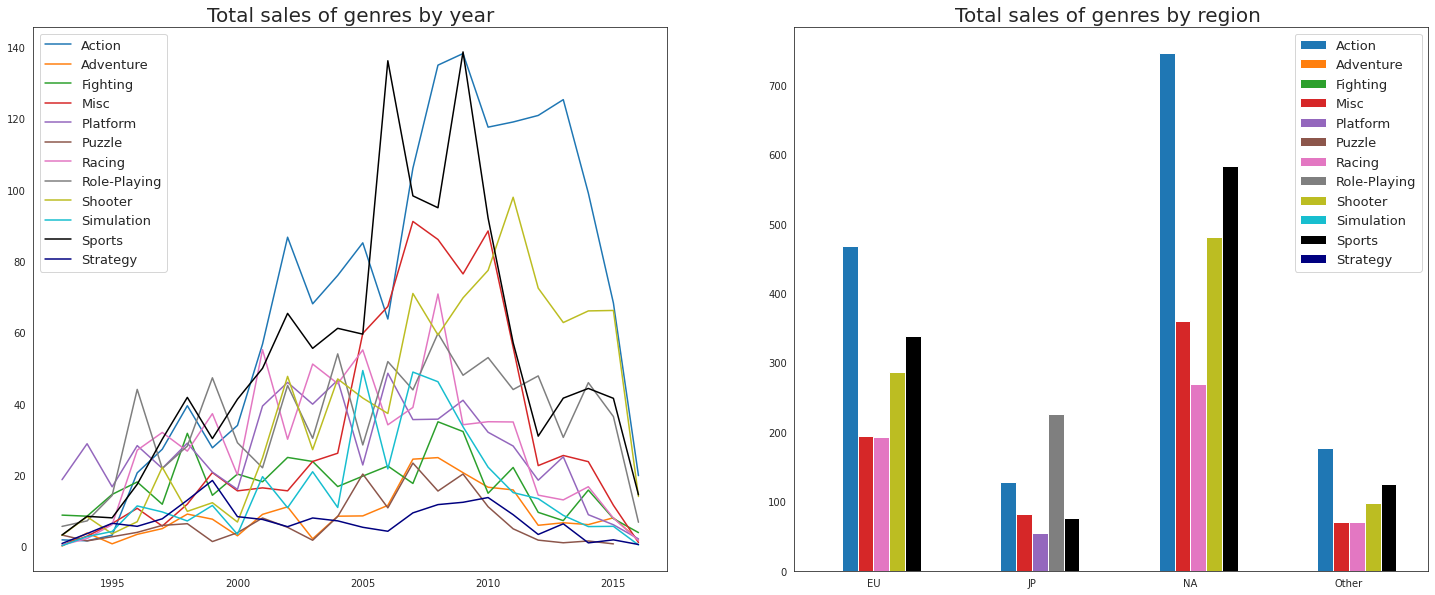

In [52]:
# 1.연도별, 지역별 장르 선호도 시각화

# 연도별 장르 선호도(판매량) 시각화
X=df5.groupby(['Year','Genre']).Total_Sales.sum().sort_index(level=0)
Xidx0=X.index.levels[0] # Year index
Xidx1=X.index.levels[1] # Genre index

fig, (ax1,ax2)=plt.subplots(1,2, figsize=(25,10))
colors=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','black','navy']
for c, i in enumerate(Xidx1):
    X2=X.loc[Xidx0,i]
    ax1.plot(X2.index.get_level_values(0), X2.values,label=i,
             color=colors[c])
ax1.legend(fontsize=13)
ax1.set_title('Total sales of genres by year',fontsize=20)


# 지역별 장르 선호도 시각화
# 이때 Recency를 확보하기 위해 2000년 이전 데이터는 드랍
X=df4_tidy[df4_tidy.Year >= 2000]
X=X.groupby(['Region','Genre']).Sales.sum()
Xidx0=X.index.levels[0] # Region index
Xidx1=X.index.levels[1] # Genre index
# X2 : X를 Region별로, 많이 팔린 장르순서로 정렬한뒤 다시 Series로
X2=X.reset_index().sort_values(['Region','Sales'],ascending=[True,False])\
.set_index(['Region','Genre']).squeeze()
# X2에서 각 Region별 상위 5개 장르로 자르기.
X2=X2.iloc[[0,1,2,3,4,12,13,14,15,16,24,25,26,27,28,36,37,38,39,40]]

# 먼저, 각 Region(0,1,2,3)마다 상위 5개 장르를 bar로 그릴것이므로, 
# 각 Region별 공간길이 0.5를 할당하고, 이를 5번 쪼개어 양쪽에 배치할예정.
# 따라서 x-0.25+w*n (n=1:5) 에서 x-0.25+w*5=x+0.25 가 되는 w=0.1
w=[0]*4
x_axis=np.arange(len(Xidx0))
for c, i in enumerate(Xidx1):
    X3=[]
    # 각 Region마다 상위5개 장르에 해당장르i가 존재하는지 확인.
    # 존재하면 X3에추가, 아니면 0
    # 각 Region 내의 공간별로, 장르i가 존재하지않을때 자리를 차지하면 안된다.
    # 따라서 존재하는 경우만 해당 Region에 w를 추가하여 자리차지.
    for widx, j in enumerate(Xidx0):
        if X2.loc[j].index.isin([i]).any():
            X3.append(X2.loc[j,i])
            w[widx]+=0.1
        else:
            X3.append(0)
    ax2.bar(x_axis-0.25+w, X3, label=i,
            color=colors[c], width=0.1)
ax2.set_xticks(x_axis,Xidx0)
ax2.set_xlim(-0.5,3.5)
ax2.legend(fontsize=13)
ax2.set_title('Total sales of genres by region ', fontsize=20)
plt.show()
# 연도별 최근 선호장르는 Action, RPG, Sports, Shooter, Misc(기타) 등등이 상위권.
# Action 빼고는 Sports와 Shooter가 우세 (Action은 상당히 넓은 범주임을 감안하자)
# 도메인 지식: RPG는 개발비용이 매우크므로, 스포츠 혹은 FPS를 고려할 수 있다.

# 지역별 장르 선호도는 4지역 모두 Action이 제일높다.
# 그외 선호장르는 JP를 제외한 지역에서 스포츠, FPS, Racing 순서로 높다.
# JP지역은 RPG,스포츠, 플랫포머 순서로 높다. 다소 취향이 떨어져있는편
# JP지역을 제외한 지역에서 서비스시, 스포츠와 FPS를 고려할 수 있다.

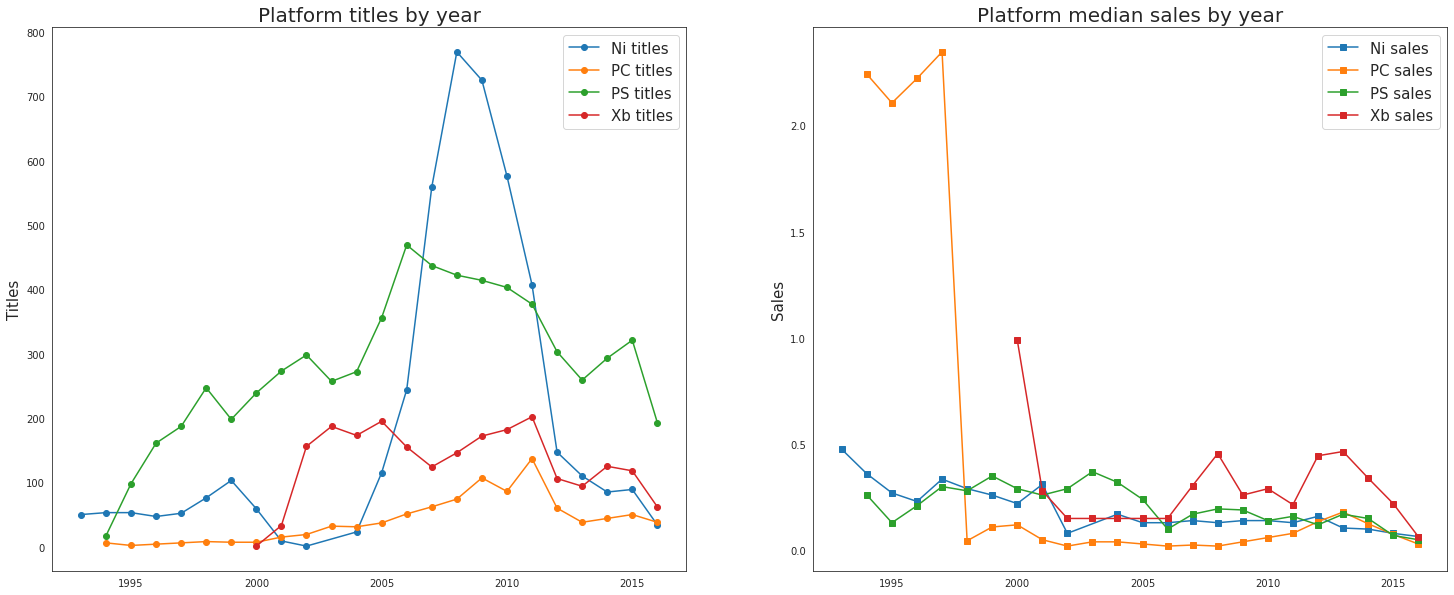

In [53]:
# 2.연도별 Platform 선호도 시각화

# 연도별 Platform 선호도 시각화. n<50 인 년도 드랍
X=df4.Year.value_counts()<50
X=X[X].index.to_list()
X=df4.drop(df4[df4.Year.isin(X)].index)
# Other Platform은 관심없으므로 드랍
X.drop(X[X.Platform2=='Other'].index,inplace=True)

# X1: 연도별 플랫폼 타이틀 출시 숫자
X1=X.groupby('Year').Platform2.value_counts() 
# X2: 연도별 플랫폼 타이틀당 판매량 중간값
X2=X.groupby(['Year','Platform2']).Total_Sales.median()
Xidx0=X1.index.levels[0]
Xidx1=X1.index.levels[1]

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
labelmap={'Nintendo':'Ni','PlayStation':'PS','Xbox':'Xb','PC':'PC'}
for c, i in enumerate(Xidx1):
    X3=X1.loc[Xidx0,i]
    ax1.plot(X3.index.get_level_values(0), X3,
             label=labelmap[i]+' titles',
             color=colors[c], marker='o')
ax1.legend(fontsize=15)
ax1.set_title('Platform titles by year', fontsize=20)
ax1.set_ylabel('Titles',fontsize=15)

for c, i in enumerate(Xidx1):
    X3=X2.loc[Xidx0,i]
    ax2.plot(X3.index.get_level_values(0), X3,
             label=labelmap[i]+' sales',
             color=colors[c], marker='s')
ax2.legend(fontsize=15)
ax2.set_title('Platform median sales by year', fontsize=20)
ax2.set_ylabel('Sales',fontsize=15)
plt.show()
# 연도별 타이틀 출시는 최근들어 PlayStation이 강세를 보이는중.
# 3개 콘솔 개별이 전부 PC시장보단 크다.
# 하지만 타이틀당 매출은 Xbox를 제외하곤 고만고만하다.
# 1997년도 부근의 높은 PC매출은 샘플숫자가 적은데 아웃라이어가 있는관계로,
# 신뢰성은 떨어진다.

# 세컨드 파티로 전환한다면, 시장이큰 PlayStaion이나 수익성이 살짝좋은 Xbox
# 중에 선택하면 될듯.

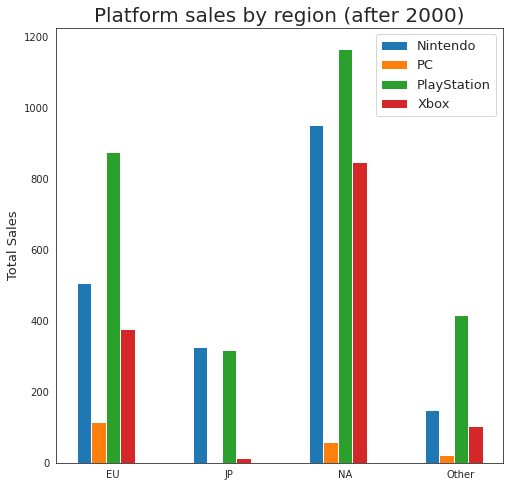

In [54]:
# 3. 지역별 Platform 선호도 시각화
# 마찬가지로 Recency를 위해 2000년 이전 데이터 드랍
X=df4_tidy[df4_tidy.Year>2000]
# 관심없는 Other Platform 드랍
X=X.drop(X[X.Platform2=='Other'].index)
X=X.groupby(['Region','Platform2']).Sales.sum()
Xidx0=X.index.levels[0]
Xidx1=X.index.levels[1]

x_axis=np.arange(len(Xidx0))
w=0
fig, ax=plt.subplots(figsize=(8,8))
for c, i in enumerate(Xidx1):
    X2=X.loc[Xidx0,i]
    ax.bar(x_axis-0.25+w,X2,label=i,
            color=colors[c], width=1/8)
    w+=1/8
ax.legend(fontsize=13)
ax.set_xticks(x_axis,labels=Xidx0)
ax.set_ylabel('Total Sales', fontsize=13)
ax.set_title('Platform sales by region (after 2000)',
             fontsize=20)
plt.show()

# 2000년대 이후로 지역별 Platform 판매량은 JP를 제외하고 PS,Ni,Xb,PC 순서
# JP지역은 Nintendo와 PS가 비슷하고 Xbox가 약세이다.

분산 비율 누적
[0.83574078 0.91876504 0.98554899 1.        ]


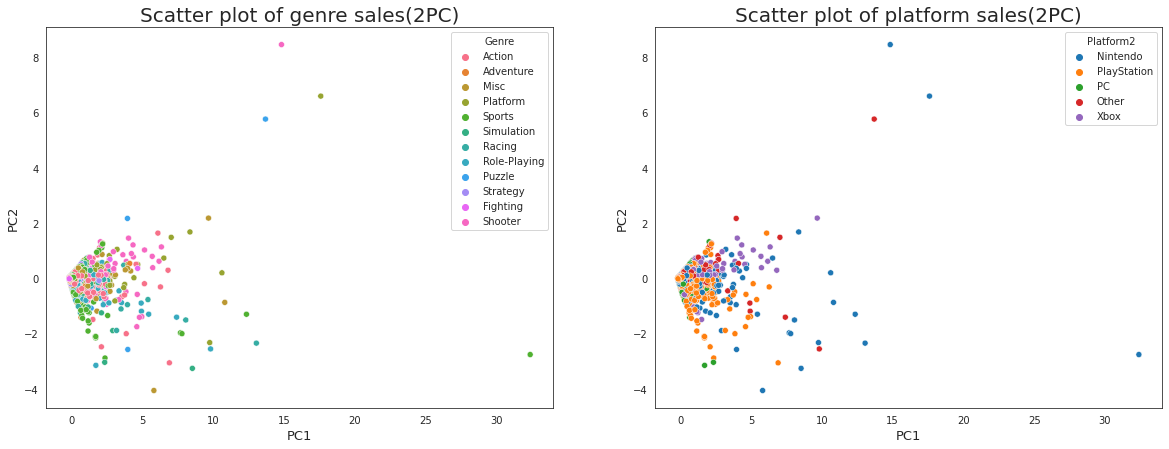

In [55]:
# 인기게임은 총 매출이 많은게임, 혹은 PCA를 진행했을때 명백히
# 다른클러스터에 있는 게임으로 정의하였다.

# 먼저, PCA를 통한 인기게임 확인
# 4개 지역 판매량 PCA로 줄이기.
total_mean=df4.Total_Sales.mean()
total_std=df4.Total_Sales.std()
features=df4[Sales_col].copy()
features=(features-total_mean)/total_std
pca=PCA()
Xpca=pca.fit_transform(features)
print('분산 비율 누적')
print(np.cumsum(pca.explained_variance_ratio_))
# 2개 PC로 91% 분산이 설명되므로 2개 가지고 Scatter Plot 생성
sns.set_style('white')
fig, (ax1, ax2)=plt.subplots(1,2,figsize=(20,7))
sns.scatterplot(ax=ax1, x=Xpca[:,0], y=Xpca[:,1],hue=df4.Genre)
ax1.set_xlabel('PC1',fontsize=13)
ax1.set_ylabel('PC2',fontsize=13)
ax1.set_title('Scatter plot of genre sales(2PC)',fontsize=20)

sns.scatterplot(ax=ax2, x=Xpca[:,0], y=Xpca[:,1],hue=df4.Platform2,
                palette='tab10')
ax2.set_xlabel('PC1',fontsize=13)
ax2.set_ylabel('PC2',fontsize=13)
ax2.set_title('Scatter plot of platform sales(2PC)',fontsize=20)
plt.show()

# PCA를 진행해서 보았을때, 명백히 대부분의 분포와 벗어나있는 점들이 존재하며,
# 이들이 인기게임임을 알 수 있다. 인기게임은 장르별로는 눈대중으로 구분하기 힘들며,
# 플랫폼 별로는 닌텐도의 비율이 높은것 같다.

# 분석 (Test, Modeling)

In [56]:
# 상황 : 콘솔사의 지원을 받으면 AAA게임 제작가능. 하지만 서드파티
#        유지시 다양한 플랫폼에서 판매 가능. AAA게임 제작불가.
#
# 판단해야할 내용 : 1.세컨드파티 전환이 좋은가 서드파티 유지가 좋은가
#                     1-1.세컨드파티로 전환한다면, AAA게임을 만들것인가 일반
#                         게임을 만들것인가
#                     1-2.서드파티를 유지한다면, 어느 지역, 어느플랫폼들에
#                         출시해야 하는가
#                   2.어떤 장르의 게임을 만들고 어느지역에 먼저 출시할 것인가.
#                   3.인기게임의 트렌드는 있는지?

# EDA를 통한 일차 직관
# 1. 연도별 최근 선호장르는 Action, RPG, Sports, Shooter, Misc(기타) 등등이 상위권.
# 2. 최근 선호장르는 JP를 제외한 지역에서 스포츠, FPS, Racing 순서로 높다.
# 3. 지역별 총판매량 순위는 NA>EU>JP=Other
# 4. 연도별 타이틀 출시(시장점유율)는 최근들어 PlayStation이 강세를 보이는중.
# 5. 하지만 타이틀당 매출은 Xbox가 살짝 높고 나머진 고만고만하다.
# 6. 2000년대 이후로 지역별 Platform 판매량은 JP를 제외하고 PS,Ni,Xb,PC 순서
# 7. 인기게임과 장르 관계는 확실치 않고, 플랫폼과 인기게임은 상관관계가 있는것 같다.

## 데이터분리 : 인기게임, 일반게임

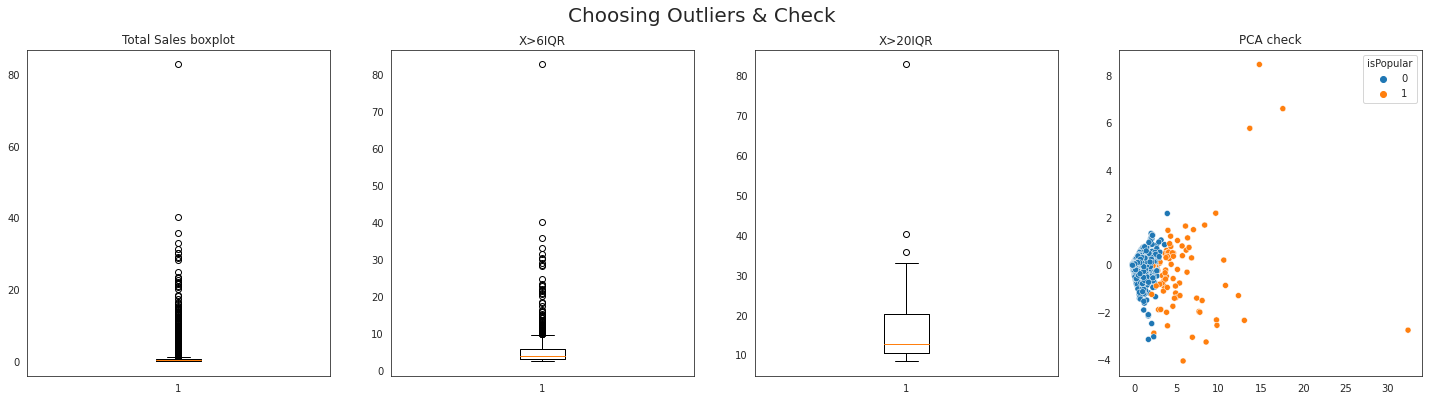

인기게임 비율 : 0.48%

인기게임 통계량
count    77.000000
mean     16.456623
std      10.607944
min       8.420000
25%      10.420000
50%      12.730000
75%      20.220000
max      82.740000
Name: Total_Sales, dtype: float64

일반게임 통계량


count    16059.000000
mean         0.462335
std          0.836232
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max          8.340000
Name: Total_Sales, dtype: float64

In [57]:
# 우선, 게임을 두 분류(일반, 인기게임)로 나뉘어 분석진행.
# 분류작업은 IQR 기준으로 boxplot을 보면서 Trial & Error 로 작업.
IQR=df4.Total_Sales.quantile(.75)-df4.Total_Sales.quantile(.25)
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(25,6))
ax1.boxplot(df4.Total_Sales)
ax1.set_title('Total Sales boxplot')
# 6*IQR보다 높은 항목들로 다시 boxplot 생성
ax2.boxplot(df4[df4.Total_Sales>6*IQR].Total_Sales)
ax2.set_title('X>6IQR')
# 여전히 아웃라이어가 많으므로 20*IQR로 다시시도
ax3.boxplot(df4[df4.Total_Sales>20*IQR].Total_Sales)
ax3.set_title('X>20IQR')
# 적당한 모양의 Boxplot이 생성되었으므로 outlier집단 기준을 20*IQR(=8.4 million) 이상으로 지정
X=df4.copy()
df_out=X[X.Total_Sales>20*IQR]
df_nout=X[~(X.Total_Sales>20*IQR)]

# isPopular : outlier집단이면 1, 아니면 0 (범주형)
df4['isPopular']=[1 if i>20*IQR else 0 for i in X.Total_Sales]

# label이 잘되었나 PC 축에서 확인
sns.scatterplot(ax=ax4, x=Xpca[:,0], y=Xpca[:,1],hue=df4.isPopular,
                palette='tab10')
ax4.set_title('PCA check')
plt.suptitle('Choosing Outliers & Check',fontsize=20)
plt.show()

# 20IQR 의 기준으로 나눴을때 PC축에서의 분포가 나름 합리적이다.
# 이때 인기게임 비율
print('인기게임 비율 : %.2f%%'%(100*df_out.shape[0]/X.shape[0]))
print('\n인기게임 통계량')
print(df_out.Total_Sales.describe())
print('\n일반게임 통계량')
df_nout.Total_Sales.describe()

## 세컨드파티 VS 서드파티

In [58]:
# 세컨드파티로 전환하면 계약한 콘솔사로부터 개발비 지원, 기술지원,
# 홍보등의 각종 지원을 받을 수 있다. 하지만 독점출시를 해야하므로
# 다양한 플랫폼에서 수익을 내기가 힘들다. 따라서 콘솔사의 지원으로
# 인한 이득이 플랫폼감소로 인한 손해보다 클지를 확인해야한다.

# 따라서 각 타이틀별로, 전체판매량에서 최대판매량을 가진 단일플랫폼의
# 판매량 비율을 통계적 추정을 통해 신뢰구간과 함께 구하고, 이를 콘솔사
# 독점계약이 상회할 수 있는지 판단한다. 즉 판단기준을 세울 수 있다.

# 우선 분석시 Outlier(인기게임) 제거된 데이터로부터 모수추정 (2000년 이후)
Y=df_nout[df_nout.Year>2000].groupby(['Name','Platform2']).Total_Sales.sum()
ratio=[]
for i in Y.index.levels[0]:
    # 출시한 플랫폼이 2개 이상이면 비율표기, 플랫폼 1개인 데이터는 처리안함.
    if Y.loc[i].index.shape[0]>1:
        Y2=Y.loc[i]
        ratio.append(round(Y2.max()/Y2.sum(),3))
print('표본 갯수 : ',len(ratio))

표본 갯수 :  1991


In [59]:
# Bootstrapping
np.random.seed(42)
ratio_mean=[]
# 샘플50개 뽑아서 5000번 진행
for i in range(1,5000):
    sample=np.random.choice(ratio, 50, replace=True)
    ratio_mean.append(sample.mean())
ratio_mean=np.array(ratio_mean)

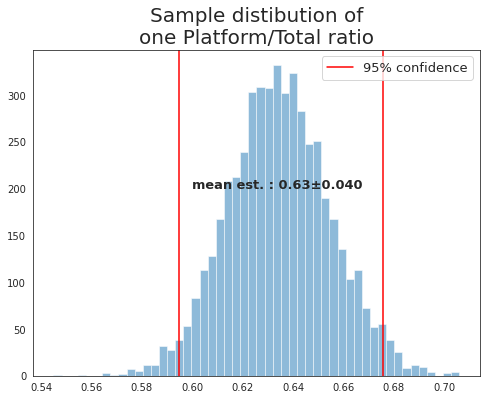

In [60]:
fig, ax1=plt.subplots(figsize=(8,6))
ax1.hist(ratio_mean, bins=50, alpha=0.5)
r_lower=np.percentile(ratio_mean, 2.5)
r_upper=np.percentile(ratio_mean, 97.5)
r_diff=(r_upper-r_lower)/2
ax1.axvline(r_lower, c='red',label='95% confidence')
ax1.axvline(r_upper, c='red')
ax1.text(0.60, 200, "mean est. : %.2f±%.3f"%(ratio_mean.mean(),r_diff),
         fontsize=13, weight='bold')
ax1.legend(fontsize=13)
ax1.set_title('Sample distibution of\none Platform/Total ratio',
              fontsize=20)
plt.show()
# 약 0.64±0.04 정도로 95% 신뢰구간이 나왔음을 확인하였다.
# 보수적으로 판단해서(기대비율이 최소인 ~0.59에서) 콘솔사 독점계약으로
# 나머지 41% 판매량 이상의 이득을 기대할 수 있으면 세컨드파티 전환을 
# 고려해볼 수 있다. 그 이하라면, 서드파티 유지가 유리하다.

### 세컨드파티 전환시 AAA시도 VS 하던대로


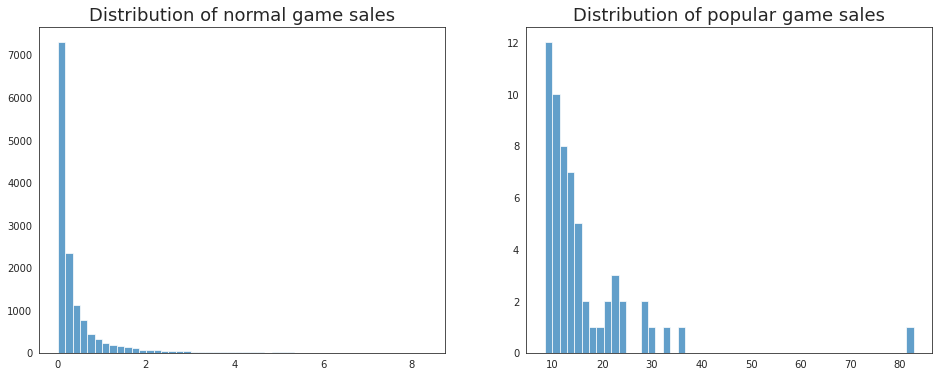

In [61]:
# 세컨드파티로 전환하여 콘솔사와 독점계약을 맺은경우, 지원을 받아
# AAA게임을 제작할 여건을 타이트하게 맞출 수 있다고 가정.
# 이때, 판단을 위해선 게임의 분류와 개발비용을 알 수 있어야하나
# 현재 데이터셋에는 판매량밖에 없다. AAA게임은 인기게임이 되는것을
# 기대하고 만드는것이기때문에, 전체게임중 인기게임의 비율과, 전체게임중
# 인기게임의 판매량 비율을 가지고 계산하여 개발비에따른 판단을 해야한다.

# 최선의 경우: AAA게임에 대한 비전과 확신을 가지고 100% 인기게임을 만든다고 가정.
# 이때 인기게임의 평균판매량과 일반게임의 평균판매량을 가지고 가성비의
# 손익분기점을 예상. 
# => Ex. 인기게임 평균 100, 일반 10 -> 투자대비수익률(ROI) 100/x >= 10/y -> x<=100*y/10=10y
#    즉 AAA게임 개발비가 일반게임의 10 아래이면 AAA게임을 개발하는게 맞다.

# 최악의 경우는 AAA게임중 인기게임 비율을 모르므로 계산불가.
# 

# 우선 일반게임과 인기게임의 판매량 분포 확인
X=df_nout[df_nout.Year>2000].Total_Sales
Y=df_out[df_out.Year>2000].Total_Sales
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(16,6))
ax1.hist(X, bins=50, alpha=0.7)
ax2.hist(Y, bins=50, alpha=0.7)
ax1.set_title('Distribution of normal game sales',
              fontsize=18)
ax2.set_title('Distribution of popular game sales',
              fontsize=18)
plt.show()
# 두개 분포 모두 right-skewed distribution 이므로 t분포 가정 이용불가
Xmean=[]
Ymean=[]
np.random.seed(42)
for i in range (1,5000):
    Xmean.append(np.random.choice(X, 300, replace=True).mean())
    Ymean.append(np.random.choice(Y, 50, replace=True).mean())

In [62]:
# 최선의 경우 보수적인 판단: ROI(Y) > ROI(X) 이때 X는 일반게임, Y는 인기게임
# 따라서 개발비 y, x에 대해 Yworst/y > Xbest/x  => y<x*(Yworst/Xbest)
# 신뢰구간 95%
Xbest=np.percentile(Xmean, 97.5)
Yworst=np.percentile(Ymean, 0.25)
# 손익분기점 계산
BEP=Yworst/Xbest
print('일반게임 평균 판매량 최선 : ',round(Xbest,3))
print('인기게임 평균 판매량 최악 : ',round(Yworst,3))
print('개발비 손익분기점 : ',round(BEP,2),'배')

# 인기게임의 개발비가 일반게임의 약 24.4배 아래이면 AAA게임을 개발하는것이 이득이다.

일반게임 평균 판매량 최선 :  0.524
인기게임 평균 판매량 최악 :  12.798
개발비 손익분기점 :  24.44 배


### 서드파티 유지시 지역, 장르, 플랫폼 판단


In [73]:
# 서드파티 유지시 AAA게임은 제작이 불가능하고, 일반게임만
# 만들 수 있다. 따라서 일반게임에 대한 지역별, 장르별, 플랫폼별 매출을
# 확인한다.

# EDA로부터 얻은 직관
# 1. 지역별 판매량 : NA>EU>JP=Other
# 2. 지역별 장르 선호 : NA,EU,Other => sports, FPS, racing 순서
#                       JP => RPG, sports, platformer 순서
#                       (이때 Racing은 최근 선호도(2010년이후) 낮아짐)
# 3. 지역별 플랫폼 선호 : NA,EU,Other => PS, Ni, Xb, PC 순서

# 우선, 지역별 평균 판매량분석.
X=df_nout[df_nout.Year>2000].copy()
# 각 지역별 0 매출은 평균계산에서 제외
X.loc[:,Sales_col]=X[Sales_col].applymap(lambda x: np.nan if x==0 else x)
display(X[Sales_col].mean().round(2).to_frame(name='mean Sales'))
# 평균판매량 NA>EU>JP>Other 순서이다.
# 평균판매량이 우연인지 아니면 차이가 있는지, ANOVA 검정.

# 샘플수가 매우많으면 분산이 아주 살짝만 달라도 레빈검정의 테스트가
# 유의하다고 나온다. 따라서 샘플수가 같으면 이분산에 어느정도
# 강성을 가진다는 경험법칙을 사용. 샘플수를 4000개로 맞추어준다.

A=X.NA_Sales.dropna().sample(4000, replace=True)
B=X.EU_Sales.dropna().sample(4000, replace=True)
C=X.JP_Sales.dropna().sample(4000, replace=True)
D=X.JP_Sales.dropna().sample(4000, replace=True)
print('P-value of ANOVA : ',round(stats.f_oneway(A,B,C,D).pvalue,5))

# p-value ~ 0 이므로 집단간 평균이 차이가 있음을 알 수 있다.
# 차이가 얼마나 나는지를 확인하기위해 사후분석. (독립 t 검정 사용)
# 가장 높은 NA가 두번째로 높은 EU평균보다 얼마나 차이나는지 0.02 단위로 확인
# 마진 0 부터 0.20까지
# H0: NA <= EU+M,  Ha: NA > EU+M | M=0 to 0.2
for i in np.arange(0, 0.21, 0.02):
    pvalue=stats.ttest_ind(X.NA_Sales, X.EU_Sales+i, equal_var=False, alternative='greater',
                           nan_policy='omit').pvalue
    print('P-value w/ margin +%.2f : '%i, round(pvalue,5))
# 검정결과 마진은 0.08 과 0.1 사이라고 주장할 수 있다. 
# 이는 NA 에서 EU보다 평균 8만장 정도 더 팔린다는 의미이므로, 시장규모 뿐만아니라
# 개별 게임의 기대 판매량측면에서도 NA를 선택하는것이 이득임을 주장할 수 있다.

,mean Sales
NA_Sales,0.29
EU_Sales,0.19
JP_Sales,0.13
Other_Sales,0.07


P-value of ANOVA :  0.0
P-value w/ margin +0.00 :  0.0
P-value w/ margin +0.02 :  0.0
P-value w/ margin +0.04 :  0.0
P-value w/ margin +0.06 :  0.0
P-value w/ margin +0.08 :  0.00061
P-value w/ margin +0.10 :  0.56167
P-value w/ margin +0.12 :  0.9998
P-value w/ margin +0.14 :  1.0
P-value w/ margin +0.16 :  1.0
P-value w/ margin +0.18 :  1.0
P-value w/ margin +0.20 :  1.0


In [79]:
# 장르 선호도 분석.
# 이전 지역선택에서 NA지역을 선택하는것을 추천하였으므로,
# NA 지역의 장르선호도가 통계적으로 어떤지 검정

# EDA로부터 지역별 장르 선호(총 판매량 기준) : 
# NA,EU,Other => Action, sports, FPS, racing 순서

X2=X.groupby('Genre').NA_Sales.mean().sort_values(ascending=False).round(3)
display(X2.to_frame(name='mean Sales'))
# 장르별 평균 판매량은 FPS, 플랫포머, 격투게임, 스포츠, RPG 순서이다.
# FPS를 제외한 상위 4개 장르의 평균이 다소 비슷해보인다. ANOVA로 검정.

A=X[X.Genre=='Shooter'].NA_Sales.dropna()
B=X[X.Genre=='Platform'].NA_Sales.dropna()
C=X[X.Genre=='Fighting'].NA_Sales.dropna()
D=X[X.Genre=='Sports'].NA_Sales.dropna()
E=X[X.Genre=='Role-Playing'].NA_Sales.dropna()

print('\nLevene\'s p-value : %.3f'%stats.levene(E,B,C,D).pvalue)
# 레빈검정의 p-value ~ 0.92 > 0.05 이므로 등분산 가정 기각불가
print('ANOVA p-value : %.3f'%stats.f_oneway(E,B,C,D).pvalue)
# ANOVA p-value ~ 0.97 > 0.05 이므로 FPS를 제외한 상위 4개 장르의
# 평균은 같다고 주장할 수 있다.

# 다음으로, 상위4개 장르중 하나인 Platform과 FPS의 평균이 같은지 비교
print('\nLevene\'s p-value of FPS, Platformer : %.3f'%stats.levene(A,B).pvalue)
# 등분산 아니므로 Welch's t test 진행, 우월성을 확인하기위해, 0.01 마진으로
# 0부터 0.4 까지 5번 진행.
for i in np.arange(0, 0.04, 0.01):
    pvalue=stats.ttest_ind(A,B+i, equal_var=False, alternative='greater').pvalue
    print('t test p-value +%.2f : %.5f'%(i,pvalue))
# 검정결과 마진은 0.01 과 0.02 사이라고 할 수 있다. 이는 FPS 장르가 나머지 상위
# 집단에비해 1만장 이상 더 팔린다는 의미인데, 이는 생각보다 큰차이라고 생각되지는
# 않으므로 EDA로부터 얻은 인기장르 목록으로부터 비교적 자유롭게 선택하면 되겠다.

,mean Sales
Genre,
Shooter,0.388
Platform,0.322
Fighting,0.320
Sports,0.317
Role-Playing,0.310
Action,0.295
Misc,0.277
Simulation,0.274
Racing,0.246



Levene's p-value : 0.923
ANOVA p-value : 0.971

Levene's p-value of FPS, Platformer : 0.018
t test p-value +0.00 : 0.00976
t test p-value +0.01 : 0.02366
t test p-value +0.02 : 0.05140
t test p-value +0.03 : 0.10041


In [80]:
# NA지역 플랫폼 선호 분석

# 플랫폼별 평균 판매량
X2=X.groupby('Platform2').NA_Sales.mean().sort_values(ascending=False).round(3)
X2.drop(index='Other', inplace=True)
display(X2.to_frame(name='mean Sales'))
# EDA로부터 얻은 직관대로, Xbox의 평균이 가장 높게 나타났으며, 그다음 PS
# Nintendo, PC 순서이다.

# Xbox의 NA지역 평균 판매량이 진짜로 높은지 확인하기위해, ANOVA 진행
A=X[X.Platform2=='Xbox'].NA_Sales.dropna()
B=X[X.Platform2=='PlayStation'].NA_Sales.dropna()
C=X[X.Platform2=='Nintendo'].NA_Sales.dropna()
D=X[X.Platform2=='PC'].NA_Sales.dropna()

print('\nLevene\'s p-value : %.3f'%stats.levene(A,B,C,D).pvalue)
# 레빈검정을 통해 등분산이 아님을 확인했으므로 표본갯수 통일
A2=A.sample(300, replace=True)
B2=B.sample(300, replace=True)
C2=C.sample(300, replace=True)
D2=D.sample(300, replace=True)
pvalue=stats.f_oneway(A2,B2,C2,D2).pvalue
print('ANOVA P-value : %.5f'%pvalue)
# ANOVA의 p-value ~ 0.0001 < 0.05이므로 플랫폼별 평균에는 차이가 있다.


# 사후검정. Welch's t test로 Xbox와 PlayStation 간의 우월성 검정
# 마진 : 0 to 0.05 increament 0.01
for i in np.arange(0, 0.051, 0.01):
    pvalue=stats.ttest_ind(A,B+i, equal_var=False, alternative='greater').pvalue
    print('margin %.2f P-value : %.5f'%(i,pvalue))
# 검정결과 마진은 0.02 와 0.03 사이에 있으므로, Xbox의 평균판매량이 PlayStaion
# 보다 2만장정도 더 높다는것을 알 수 있다. 다만 시장 자체는 EDA에서 조사했듯
# PlaySation이 더 크다. 따라서 어느플랫폼이 더 좋은지 단언하기 힘들다.

,mean Sales
Platform2,
Xbox,0.354
PlayStation,0.305
Nintendo,0.255
PC,0.174



Levene's p-value : 0.000
ANOVA P-value : 0.00000
margin 0.00 P-value : 0.00039
margin 0.01 P-value : 0.00379
margin 0.02 P-value : 0.02407
margin 0.03 P-value : 0.09992
margin 0.04 P-value : 0.27838
margin 0.05 P-value : 0.54253


In [66]:
# 요약. 
# 1.지역의 경우 시장과 평균판매량 모두 NA가 차선책을 앞섰으며, 마진도 컸다.
# 2.장르는 NA지역에서 상위5개 그룹간 큰차이가 없는편이다.
# 3.NA지역 플랫폼은 Xbox의 평균판매량이 살짝 크지만, 시장은 PlayStation이 더 크다.

# 자신있게 단언할 수 있는 부분은 지역을 NA로 정해야 하며, 장르는 큰상관 없다는
# 부분이다.  플랫폼은 추가조사가 필요하다.

## 인기게임과 장르 & 플랫폼의 상관관계

In [92]:
# PCA로 얻은 직관을 카이제곱 검정으로 확인 
# Recency 확보를 위해 2000년 이전 데이터 드랍
X=df4[df4.Year>2000]

# EDA시에 눈대중으론 장르와 인기게임의 상관관계 확인이 어려웠다.
# 따라서 검정을 통해 확인한다.
# H0: 장르와 인기게임여부는 상관관계가 없다.
# Ha: 상관관계가 있다.
# 상위 5개 항목 Contingency Table 생성
print('Genre contingency table')
X2=pd.crosstab(index=X.Genre, columns=X.isPopular, margins=False)
X2['ratio']=round(X2[1]/(X2[0]+X2[1]),3)
X2=X2.sort_values(by='ratio', ascending=False).iloc[:6]
# 기타 장르인 Misc 드랍
X2.drop(index='Misc',inplace=True)

display(X2)
print('P-value : %.5f'%stats.chi2_contingency(X2.loc[:,[0,1]].to_numpy()).pvalue)
# p-vale = 0.0008 < 0.05 이므로, 인기장르간에 인기게임 비율차이가 존재한다.
# FPS가 비율이 가장높으므로, 비록 AAA게임을 만들지 않더라도 FPS게임을 만드는것이
# 인기게임이 될 확률이 높으므로 이득이다. (가능성 측면에서)


# 두번째 직관은 닌텐도의 인기게임이 많다는 것.
# 직관이 맞는지를 확인하기위해, 두 범주형 변수 플랫폼과 인기게임여부를
# 카이제곱 독립성 검정을통해 관계가 있는지 알아본다. 유의수준 a=0.05
# H0: 닌텐도와 다른플랫폼의 인기게임 비율(기대값)에는 차이가 없다.
# Ha: 차이가 있다.
# Contingency Table 생성
print('\n\n Platform contingency table')
X2=pd.crosstab(index=X.Platform2, columns=X.isPopular, margins=False)
# 이때 관심있는것은 닌텐도와 나머지이므로, 나머지플랫폼 전부 합치기.
X2.loc['Other']=X2.loc[['Other','PC','PlayStation','Xbox']].sum()
X2=X2.loc[['Nintendo','Other']]
X2['ratio']=round(X2[1]/(X2[0]+X2[1]),3)
display(X2)
print('P-value : %.4f'%stats.chi2_contingency(X2.loc[:,[0,1]].to_numpy()).pvalue)
# p-value = 0.004 < 0.05 이므로, 닌텐도와 인기게임비율에는 상관관계가 있다.
# 다만 둘에겐 상관관계만 있을뿐, 인과관계를 보장하진 않는다.
# 인기게임은 편차가 상당히 크고 표본수도 부족하므로, 추가 인과분석 필요


Genre contingency table


isPopular,0,1,ratio
Genre,,,
Shooter,1067,16,0.015
Platform,679,6,0.009
Racing,970,6,0.006
Simulation,734,3,0.004
Action,2950,9,0.003


P-value : 0.00080


 Platform contingency table


isPopular,0,1,ratio
Platform2,,,
Nintendo,3866,27,0.007
Other,9912,32,0.003


P-value : 0.0041


# 판단 및 결론

In [68]:
# EDA를 통한 일차 직관
# 1. 연도별 최근 선호장르는 Action, RPG, Sports, Shooter, Misc(기타) 등등이 상위권.
# 2. 최근 선호장르는 JP를 제외한 지역에서 스포츠, FPS, Racing 순서로 높다.
# 3. 지역별 총판매량 순위는 NA>EU>JP=Other
# 4. 연도별 타이틀 출시(시장점유율)는 최근들어 PlayStation이 강세를 보이는중.
# 5. 하지만 타이틀당 매출은 Xbox가 살짝 높고 나머진 고만고만하다.
# 6. 2000년대 이후로 지역별 Platform 판매량은 JP를 제외하고 PS,Ni,Xb,PC 순서
# 7. 인기게임과 장르 관계는 확실치 않고, 플랫폼과 인기게임은 상관관계가 있는것 같다.

# 분석을 통한 판단
# 1. 세컨드 vs 서드 : 보수적으로 판단해서(기대비율이 최소인 ~0.59에서) 콘솔사 
#    독점계약으로 나머지 41% 판매량 이상의 이득을 기대할 수 있으면 세컨드파티 전환을 
#    고려해볼 수 있다. 그 이하라면, 서드파티 유지가 유리하다.
# 2. AAA게임 vs 일반게임 : 최선의 경우만 제한적으로 판단가능. 인기게임의 개발비가 
#    일반게임의 약 24.8배 아래이면 AAA게임을 개발하는것이 이득이다.
# 3. 서드 유지시 지역 장르 플랫폼 
#    3-1. 지역 : NA 에서 차선인 EU보다 평균 8만장 정도 더 팔린다.
#    시장규모 뿐만아니라 개별 게임의 기대 판매량측면에서도 NA를 선택하는것이 이득이다.
#    3-2. 장르 : FPS 장르가 나머지 상위 집단에비해 1만장 정도 더 팔린다. 이는 생각보다 
#    큰차이라고 생각되지는 않으므로 EDA로부터 얻은 인기장르 목록으로부터 비교적 자유롭게 선택
#    3-3. 플랫폼 : Xbox의 평균판매량이 PlayStation 보다 2만장정도 더 높다. 
#    다만 시장 자체는 EDA에서 조사했듯 PlayStation이 더 크다.
# 4. 인기게임에 트렌트?
#    장르 : 장르간에 인기게임 비율차이가 존재한다.
#    FPS가 비율이 가장높으므로, 비록 AAA게임을 만들지 않더라도 FPS게임을 만드는것이
#    인기게임이 될 확률이 높으므로 이득이다.
#    플랫폼 : 닌텐도와 인기게임비율에는 상관관계가 있다.
#    다만 둘에겐 상관관계만 있을뿐, 인과관계를 보장하진 않는다.
#    인기게임은 편차가 상당히 크고 표본수도 부족하므로, 추가 인과분석 필요

In [69]:
# Fix : 장르는 FPS로

# 콘솔사 지원으로 평균판매량 41% 이상 이득? -> 세컨드파티
#  - AAA게임에 대한 확신이 있고, 예상개발비 25배 이하? -> AAA게임개발, Nintendo 추천. 아니면 일반게임
#    - 시장규모가 평균판매량보다 중요? -> PlayStation. 아니면 Xbox

# 서드파티 : NA지역 먼저 출시. 이후 확장

## 한계 및 제안

In [69]:
# 데이터셋 한계
# 1. 개발비용 feature 없음 -> AAA게임과 일반게임 구분불가
# 2. BM feature 없음 -> 게임 BM 결정 불가
# 3. 판매단가 feature 없음 -> 판매량만으로 판단

# 보완점
# 1.개발비용, BM, 판매단가 feature 추가 수집
# 2.Platform에 모바일 그룹 추가
